In [2]:
# Linear and Polynomial regression

In [10]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Creating the numpy array
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

In [12]:
# Initialize the model
m = GEKKO()

In [17]:
# Set global options
m.options.IMODE = 2

In [13]:
# Define coefficients
c = [m.FV(value=0) for i in range(4)]
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1

In [15]:
# Polynomial model
eq_poly = c[0]+c[1]*x+c[2]*x**2+c[3]*x**3
m.Equation(y == eq_poly)

In [18]:
# Linear regression
c[0].STATUS = 1
c[1].STATUS = 1
m.solve(disp=False)
p1 = [c[1].value[0], c[0].value[0]]

In [19]:
# Quadratic
c[2].STATUS = 1
m.solve(disp=False)
p2 = [c[2].value[0], c[1].value[0], c[0].value[0]]

In [20]:
# Cubic
c[3].STATUS = 1
m.solve(disp=False)
p3 = [c[3].value[0], c[2].value[0], c[1].value[0], c[0].value[0]]

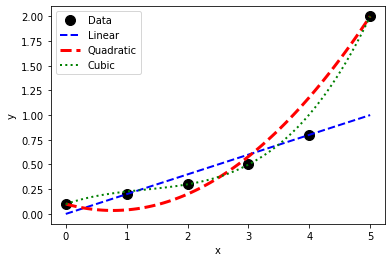

In [22]:
# Plot fit results
plt.plot(xm, ym, 'ko', markersize = 10)
xp = np.linspace(0, 5, 100)
plt.plot(xp, np.polyval(p1, xp), 'b--', linewidth = 2)
plt.plot(xp, np.polyval(p2, xp), 'r--', linewidth = 3)
plt.plot(xp, np.polyval(p3, xp), 'g:', linewidth = 2)
plt.legend(['Data', 'Linear', 'Quadratic', 'Cubic'], loc = 'best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()